In [116]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
# We vertrekken van de titanic dataset titanic-train.csv (zie BB)
# TO DO: lees dit csv bestand in
titanic_df = pd.read_csv('titanic-train.csv')


In [118]:
# TO DO: toon de eerste 10 rijen van deze dataset
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [119]:
# TO DO: hoeveel rijen en hoeveel kolommen heeft deze dataset, maw wat is de shape van deze dataset?
titanic_df.shape

(891, 12)

In [120]:
# Doel: passagiers uit de testdata classificeren als survived of niet
# Niet alle features spelen een rol in overleving 
# TO DO: delete deze features: id, naam, nr ticket en cabin
# Je kan hiervoor de drop() methode gebruiken; let erop dat je de aanpassingen doet in de dataset zelf
titanic_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [121]:
# TO DO: toon opnieuw de eerste 10 rijen van deze dataset: je mag nu nog maar 8 kolommen overhouden
titanic_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [122]:
# TO DO: Bepaal het aantal missing values per feature
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [123]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [124]:
# ML algoritmen kunnen niet omgaan met missing values; 2 mogelijkheden (zie deel 2 data repre): imputation of delete
# Wij kiezen voor deleten
# TO DO: delete de observaties (personen) met missing values; de methode dropna() kan je hiervoor gebruiken
titanic_df.dropna(inplace=True)

In [125]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [126]:
# TO DO: Bepaal opnieuw de shape van deze dataset; je houdt nu 712 rijen en 8 kolommen over.
titanic_df.shape

(712, 8)

In [127]:
# Vraag voor de numerische variabelen hetvolgende op:
# - aantal niet null waarden
# - gemiddelde
# - standaard afwijking
# - minimum en maximum waarde
# - de 3 kwartielen
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


<AxesSubplot:title={'center':'Age'}, xlabel='Survived'>

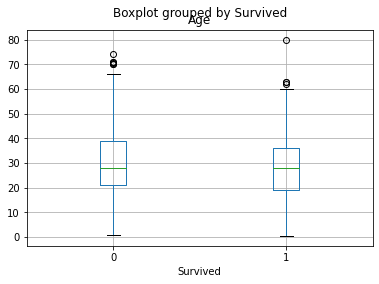

In [128]:
# We zoeken die features die invloed hebben op survived
# TO DO: Is er een verband tussen survived en leeftijd?
titanic_df.boxplot('Age', 'Survived')

<AxesSubplot:title={'center':'Fare'}, xlabel='Survived'>

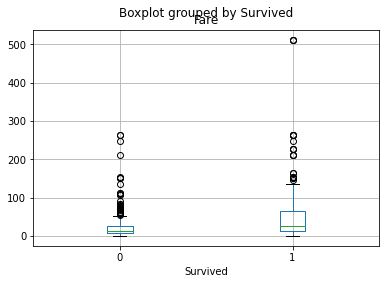

In [129]:
# We zoeken die features die invloed hebben op survived
# TO DO: Is een verband tussen survived en fare?
titanic_df.boxplot('Fare', 'Survived')

In [130]:
# We zoeken die features die invloed hebben op survived
# Speelt het geslacht een rol in surviven? 
# TO DO: Zoek het verband tussen survived en geslacht
pd.crosstab(titanic_df.Survived, titanic_df.Sex)

Sex,female,male
Survived,,
0,64,360
1,195,93


In [131]:
# We zoeken die features die invloed hebben op survived
# Speelt passengerClass een rol in surviven? 
# TO DO: Zoek het verband tussen survived en passengerclass
pd.crosstab(titanic_df.Survived, titanic_df.Pclass)

Pclass,1,2,3
Survived,,,
0,64,90,270
1,120,83,85


In [132]:
pd.crosstab(titanic_df.Survived, titanic_df.Pclass, normalize=True)

Pclass,1,2,3
Survived,,,
0,0.089888,0.126404,0.379213
1,0.168539,0.116573,0.119382


In [133]:
# Is er verband (correlatie) tussen de features onderling? 
# TO DO: bepaal de correlatie tussen de features
titanic_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


In [134]:
# Start ML ==> we maken de dataset klaar voor het toepassen van ML algorime
# Herinner ML algoritmen hebben numerieke waarden nodig ==> labels vervangen door getallen
# Eerte feature die we omzetten in numerieke waarden is Sex: 'female' / 'male ' ==> 0 / 1
# We gebruiken de fit_transform() methode (van LabelEncoder()) om female om te zetten naar 0 en male naar 1
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])


In [135]:
# TO DO: toon de eerste 5 rijen van deze dataset en controleer dat "Sex" bestaat uit 0 en 1
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [136]:
# origine waarden van 'Sex' kan je terugvinden via  
label_encoder.classes_

array(['female', 'male'], dtype=object)

In [137]:
# Tweede feature die we omzetten in numerieke waarden is Embarked
# Niet geordende categorische data kan omgezet worden met oa. one hot encoding
# De categorische variabele embarked ==> 3 nieuwe discrete variabelen (met waarden 0 en 1)
titanic = pd.get_dummies(titanic_df, columns=['Embarked'])
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [138]:
# Shuffle de dataset
titanic = titanic.sample(frac=1).reset_index(drop=True) 
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,18.0,0,0,6.7500,0,1,0
1,0,3,1,18.0,1,0,6.4958,0,0,1
2,1,3,1,27.0,0,0,8.6625,0,0,1
3,0,3,1,25.0,0,0,7.8958,0,0,1
4,0,1,1,38.0,0,0,0.0000,0,0,1


In [139]:
# We schrijven de nieuwe data weg naar een csv bestand 
titanic.to_csv('titanic_train_df_klaar.csv', index = False) 
titanic_ML = pd.read_csv('titanic_train_df_klaar.csv')

In [140]:
# TO DO: Splits de dataset op in "train" en "test" (80% train en 20% test)
# TO DO: zet income in X en outcome (nl survived) in y
# Je kan hiervoor de voorgeprogrammeerde methode train_test_split() gebruiken

from sklearn.model_selection import train_test_split
X = titanic_ML.drop('Survived', axis=1)
y = titanic_ML['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)



In [141]:
# TO DO: vraag de shape op van X_train en y_train
X_train.shape, y_train.shape

((569, 9), (569,))

In [142]:
# TO DO: print de eerste 5 rijen van X_train
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
484,1,0,53.0,2,0,51.4792,0,0,1
621,3,1,24.0,0,0,9.5000,0,0,1
705,2,0,24.0,0,2,14.5000,0,0,1
487,3,0,23.0,0,0,7.9250,0,0,1
246,1,1,70.0,1,1,71.0000,0,0,1


In [143]:
# TO DO: vraag de shape op van X_test en y_test
X_test.shape, y_test.shape

((143, 9), (143,))

In [144]:
# Pas het logistic regression algoritme voor classificatie toe
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty= 'l2', solver='liblinear').fit(X_train, y_train)

In [145]:
# TO DO: bepaal de voorspelde waarde y_pred
y_pred = logistic_model.predict(X_test)

In [146]:
# Hoe goed is deze predictie?
# Print de echte y-waarde en de voorspelde y-waarde af van 10 personen
y_test.head(10)

359    0
653    1
235    0
687    0
439    1
197    0
287    0
578    1
150    1
401    0
Name: Survived, dtype: int64

In [147]:
y_pred[0:10]

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [148]:
pred_results = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
pred_results.head(10)

,y_test,y_pred
359,0,0
653,1,0
235,0,0
687,0,0
439,1,1
197,0,0
287,0,0
578,1,1
150,1,0
401,0,0


In [149]:
# TO DO: maak een kruistabel van y_pred tov y_test
pd.crosstab(y_pred, y_test)

Survived,0,1
row_0,,
0,81,18
1,8,36


In [150]:
# Er zijn kengetallen die de juistheid van de voorspelling weergeven
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [151]:
# TO DO: bepaal de accuracy_score tussen y_test en y_pred
# TO DO: bepaal de precision_score tussen y_test en y_pred
# TO DO: bepaal de recall_score tussen y_test en y_pred
print(accuracy_score(y_test, y_pred, normalize=True))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.8181818181818182
0.8181818181818182
0.6666666666666666


In [152]:
# Ditzelfde kan je ook berekenen uit de crosstab
titanic_crosstab = pd.crosstab(y_pred, y_test)
titanic_crosstab

Survived,0,1
row_0,,
0,81,18
1,8,36


In [153]:
TP = titanic_crosstab[1][1] #True Positve
TN = titanic_crosstab[0][0] #True Negative
FN = titanic_crosstab[1][0] 
FP = titanic_crosstab[0][1]  
print(FP)

8


In [154]:
acc_score_controle = (TP + TN) / (TP + TN + FP + FN)
prec_score_controle = TP / (TP + FP)
rec_score_controle = TP / (TP + FN)
print(acc_score_controle)
print(prec_score_controle)
print(rec_score_controle)

0.8181818181818182
0.8181818181818182
0.6666666666666666


In [155]:
#extra uitleg over functies...
from sklearn.model_selection import train_test_split
?train_test_split

Signature: train_test_split(*arrays, **options)
Docstring:
Split arrays or matrices into random train and test subsets

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

train_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the
 